In [1]:
#load necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [2]:
#Load insurance dataset
my_insurance = pd.read_csv('insurance (2).csv')

In [3]:
#Read data as dataframe (2-dimensional data structure i.e rows and columns)
my_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Shape of Data (rows, cols)
my_insurance.shape

(1338, 7)

In [5]:
#Datatype of each attribute
my_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Making a list of missing value types and let Pandas recognize them while importing the data
missing_values = ["n/a", "na", "--", "NaaN"]
my_insurance = pd.read_csv('insurance (2).csv', na_values = missing_values)

In [7]:
#5 point summary of numerical attributes
my_insurance.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


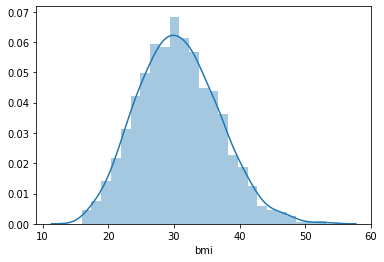

In [10]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns using distplots
sns.distplot(my_insurance['bmi'])

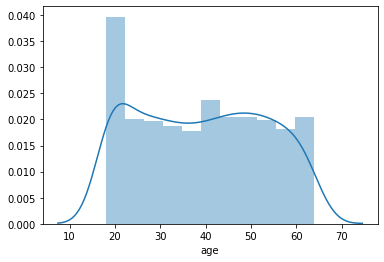

In [11]:
sns.distplot(my_insurance['age'])

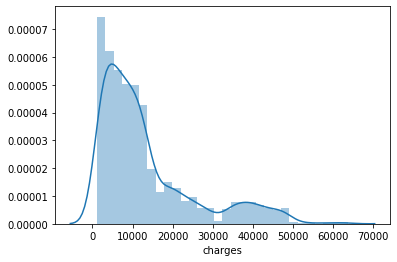

In [12]:
sns.distplot(my_insurance['charges'])

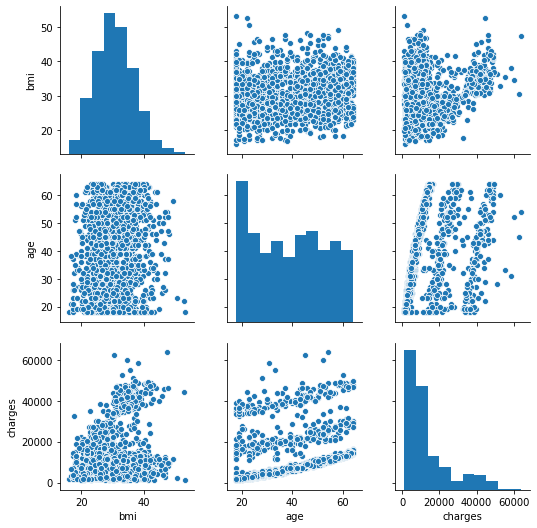

In [13]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns using pairplot
sns.pairplot(my_insurance[['bmi', 'age', 'charges']])
plt.show()

In [8]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
my_insurance[['bmi', 'age', 'charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

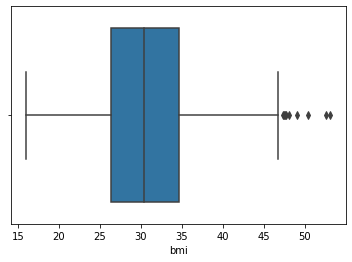

In [9]:
#presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns using boxplots (kindly note the datapoints which is more or less
# than 1.5 times Q3, Q1 respectively)
sns.boxplot(my_insurance['bmi'])
plt.show()

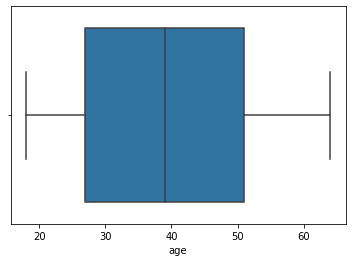

In [16]:
sns.boxplot(my_insurance['age'])
plt.show()

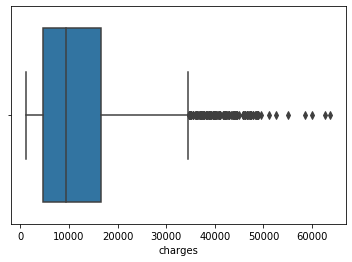

In [17]:
sns.boxplot(my_insurance['charges'])
plt.show()

In [10]:
#presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns using IQR 
Q1 = my_insurance.quantile(0.25)
Q3 = my_insurance.quantile(0.75)
IQR = Q3 - Q1
IQR

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [11]:
#The below code will give an output with some true and false values where true is an outlier
print (my_insurance < (Q1 - 1.5 * IQR)) | (my_insurance > (Q3 + 1.5 * IQR))

        age    bmi  charges  children  region    sex  smoker
0     False  False    False     False   False  False   False
1     False  False    False     False   False  False   False
2     False  False    False     False   False  False   False
3     False  False    False     False   False  False   False
4     False  False    False     False   False  False   False
5     False  False    False     False   False  False   False
6     False  False    False     False   False  False   False
7     False  False    False     False   False  False   False
8     False  False    False     False   False  False   False
9     False  False    False     False   False  False   False
10    False  False    False     False   False  False   False
11    False  False    False     False   False  False   False
12    False  False    False     False   False  False   False
13    False  False    False     False   False  False   False
14    False  False    False     False   False  False   False
15    False  False    Fa

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

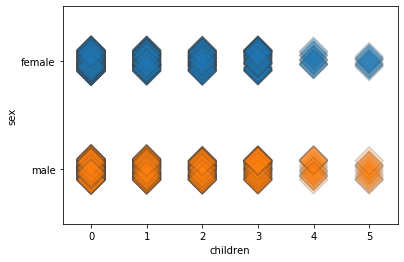

In [20]:
#Distribution of categorical columns (include children) using Stripplot
#Children vs Sex
sns.stripplot(my_insurance['children'], my_insurance['sex'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)
plt.show()

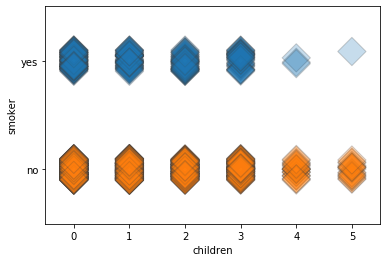

In [21]:
#Children vs Smoker
sns.stripplot(my_insurance['children'], my_insurance['smoker'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)
plt.show()

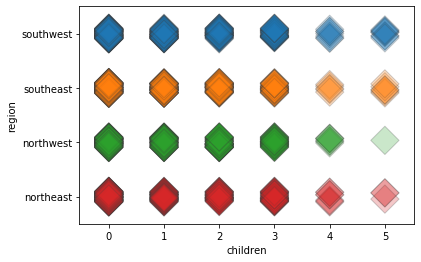

In [22]:
#Children vs region
sns.stripplot(my_insurance['children'], my_insurance['region'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)
plt.show()

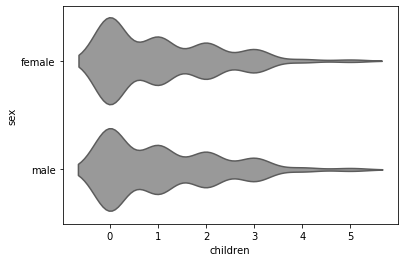

In [23]:
#Distribution of categorical columns (include children) using Violinplot
#Children vs Sex
sns.violinplot(my_insurance['children'], my_insurance['sex'],
                         inner=None, color=".6")

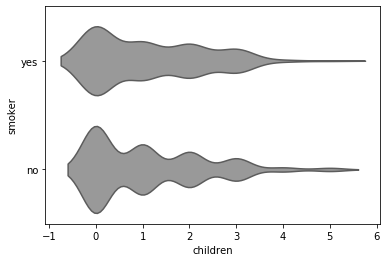

In [24]:
#Children vs Smoker
sns.violinplot(my_insurance['children'], my_insurance['smoker'],
                         inner=None, color=".6")

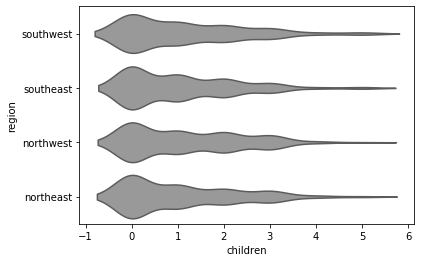

In [25]:
#Children vs region
sns.violinplot(my_insurance['children'], my_insurance['region'],
                         inner=None, color=".6")

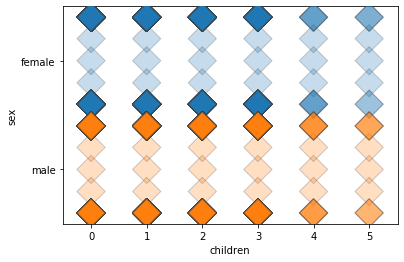

In [26]:
#Distribution of categorical columns (include children) using swarmplot
#Children vs Sex
sns.swarmplot(my_insurance['children'], my_insurance['sex'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)

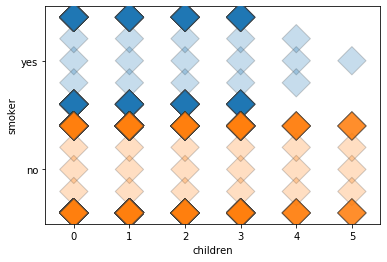

In [27]:
#Children vs Smoker
sns.swarmplot(my_insurance['children'], my_insurance['smoker'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)

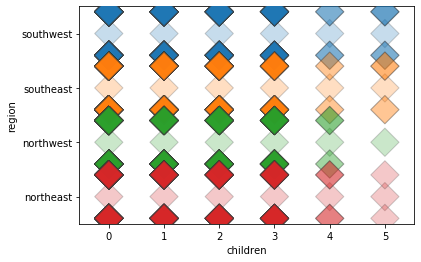

In [28]:
#Children vs region
sns.swarmplot(my_insurance['children'], my_insurance['region'], size = 20, linewidth=1, 
              marker = "D", edgecolor="gray", alpha = .25)

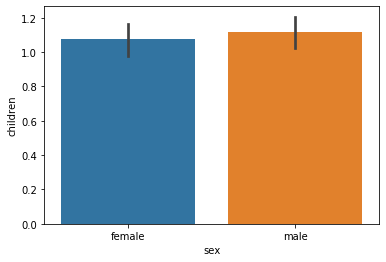

In [29]:
#Distribution of categorical columns (include children) using barplot
#Children vs Sex
sns.barplot(x='sex',y='children',data=my_insurance)

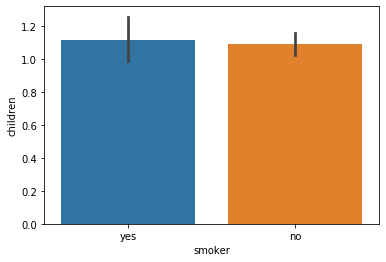

In [30]:
#Children vs Smoker
sns.barplot(x='smoker', y='children',data=my_insurance)

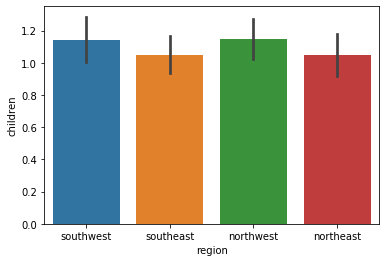

In [31]:
#Children vs region
sns.barplot(x='region', y='children',data=my_insurance)

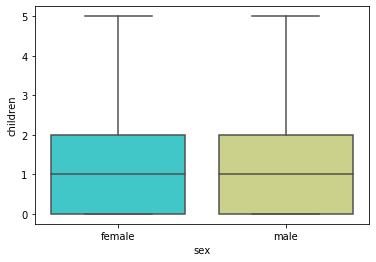

In [32]:
#Distribution of categorical columns (include children) using boxplot
#Children vs Sex
sns.boxplot(x='sex', y='children', data=my_insurance, palette='rainbow')

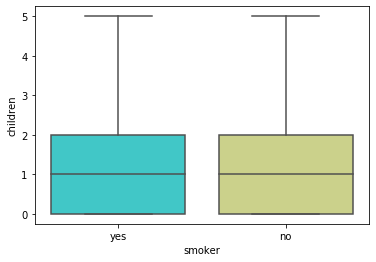

In [33]:
#Children vs Smoker
sns.boxplot(x='smoker', y='children', data=my_insurance, palette='rainbow')

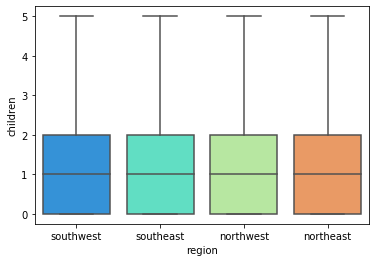

In [34]:
#Children vs Region
sns.boxplot(x='region', y='children', data=my_insurance, palette='rainbow')

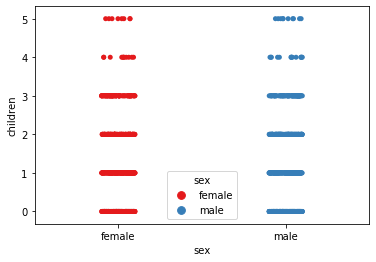

In [35]:
#Distribution of categorical columns (include children) using stripplot
#Children vs Sex
sns.stripplot(x="sex",y="children",data=my_insurance,jitter=True,hue='sex',palette='Set1')

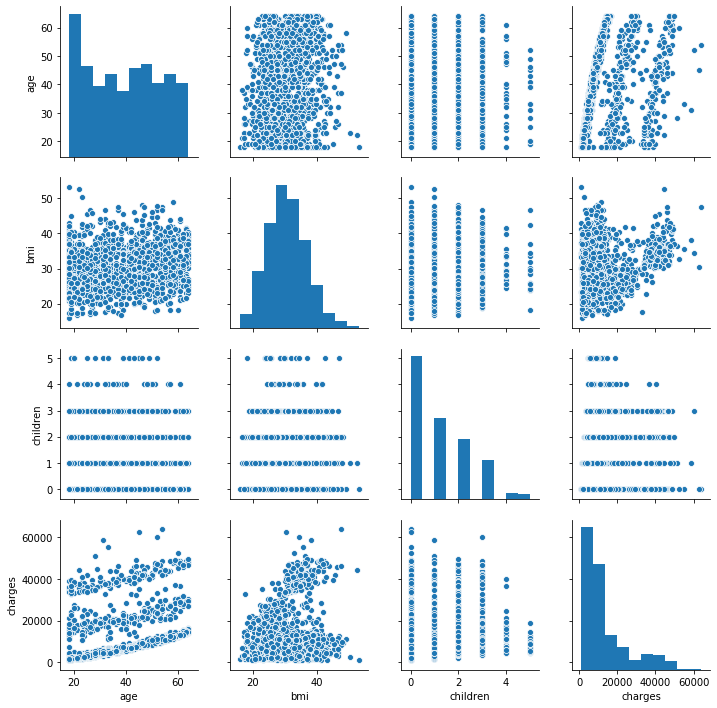

In [36]:
#Pair plot that includes all the columns of the dataframe
sns.pairplot(my_insurance)

In [12]:
# Do charges of people who smoke differ significantly
# from the people who don't?
# Performing Independent t test to determine statistical evidence between mean of 2 independent groups
# Splitting the data into 2 groups 1) SDF dataframe = Smoker with charges 2) NSDF dataframe = NonSmoker with charges
SDF = my_insurance[my_insurance['smoker'] =="yes"]
SDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100


In [13]:
NSDF = my_insurance[my_insurance['smoker'] =="no"]
NSDF

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080


In [14]:
SDF_mean = np.mean(SDF['charges'])
NSDF_mean = np.mean(NSDF['charges'])

In [15]:
SDF_mean

32050.23183153285

In [16]:
NSDF_mean

8434.268297856199

In [17]:
SDF_std = np.std(SDF['charges'])
NSDF_std = np.std(NSDF['charges'])

In [65]:
SDF_std

11520.466706529429

In [18]:
NSDF_std

5990.964530287611

In [19]:
#Independent t Test taking into consideration the means of 2 independent groups with significance of 5%
ttest,pval = ttest_ind(SDF['charges'],NSDF['charges'])
print("p-value",pval)

p-value 8.271435842177219e-283


In [20]:
if pval <0.05:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")

reject null hypothesis


In [21]:
# Does bmi of males differ significantly from that of females?
# Performing Independent t test to determine statistical evidence between mean of 2 independent groups
# Splitting the data into 2 groups 1) MBMIDF dataframe = Male with BMIs 2) FBMIDF dataframe = Female with BMIs
MBMIDF = my_insurance[my_insurance['sex'] =="male"]
MBMIDF

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
12,23,male,34.400,0,no,southwest,1826.84300
14,27,male,42.130,0,yes,southeast,39611.75770
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155


In [22]:
FBMIDF = my_insurance[my_insurance['sex'] =="female"]
FBMIDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600


In [23]:
MBMIDF_mean = np.mean(MBMIDF['bmi'])
FBMIDF_mean = np.mean(FBMIDF['bmi'])

In [24]:
MBMIDF_mean

30.943128698224832

In [25]:
FBMIDF_mean

30.377749244713023

In [26]:
MBMIDF_std = np.std(MBMIDF['bmi'])
FBMIDF_std = np.std(FBMIDF['bmi'])

In [27]:
MBMIDF_std

6.135891193330876

In [28]:
FBMIDF_std

6.041454877245924

In [29]:
#Independent t Test taking into consideration the means of 2 independent groups with significance of 5%
ttest,pval = ttest_ind(MBMIDF['bmi'],FBMIDF['bmi'])
print("p-value",pval)

p-value 0.08997637178984932


In [30]:
if pval <0.05:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")

fail to reject null hypothesis


In [31]:
#Is the proportion of smokers significantly different in different genders 
#i.e Ho = proportions are equal & Ha= proportions are not equal
# lets split the data and get count of smokers as per different genders
fsmokers = my_insurance[my_insurance['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
fsmokers

115

In [32]:
n_females = my_insurance.sex.value_counts()[1] # number of females in the dat
n_females

662

In [33]:
msmokers = my_insurance[my_insurance['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
msmokers

159

In [34]:
n_males = my_insurance.sex.value_counts()[0] #number of males in the data
n_males

676

In [35]:
print([fsmokers, msmokers] , [n_females, n_males])

[115, 159] [662, 676]


In [36]:
print(f'Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [37]:
#to find statistically if the proportions are different Z proportion test is considered
from statsmodels.stats.proportion import proportions_ztest

In [38]:
stat,pval = proportions_ztest([fsmokers, msmokers], (n_females,n_males))
print("p-value",pval)

p-value 0.005324114164320532


In [39]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


In [40]:
#Is the distribution of bmi across women with no
# children, one child and two children, the same? i.e Hyp null = bmi = same
# First lets have seperate dataframe for women with no children, 1 child, 2 child
WDF = my_insurance[my_insurance['sex'] == "female"]

In [41]:
WDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600


In [44]:
# WomenDF with no, 1 & 2 children
W012DF =  WDF[WDF['children'] < 3]

In [45]:
W012DF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600
23,34,female,31.920,1,yes,northeast,37701.87680


In [122]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [123]:
mod = ols('BMI ~ Women with 0,1,2 children', data = W0M).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
#getting error with syntax

SyntaxError: invalid syntax (<unknown>, line 1)